https://colab.research.google.com/drive/1JFlu4RxKPbMRRlzoaxPQU7twK0B3igZX?usp=sharing

In [1]:
%cd https://github.com/zoya4477/datascienceIntern.git
!git clone
!git config global user.email "zoyahafeez785@gmail.com"
!git config global user.name "zoya4477"

[Errno 2] No such file or directory: 'https://github.com/zoya4477/datascienceIntern.git'
/content
fatal: You must specify a repository to clone.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
           

**Project :- 1**

 MODEL EVALUATION

Model Evaluation on MNIST

In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
# One-hot encode target labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:
#Build a simple ANN model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train model
model.fit(X_train, y_train_cat, epochs=3, batch_size=128, validation_split=0.1)

Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8197 - loss: 0.6422 - val_accuracy: 0.9638 - val_loss: 0.1361
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9537 - loss: 0.1540 - val_accuracy: 0.9683 - val_loss: 0.1095
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9701 - loss: 0.1000 - val_accuracy: 0.9725 - val_loss: 0.0924


In [ ]:
#Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9708
Precision: 0.9708728613777957
Recall: 0.9708
F1 Score: 0.9707713949027102

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.96      0.98      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



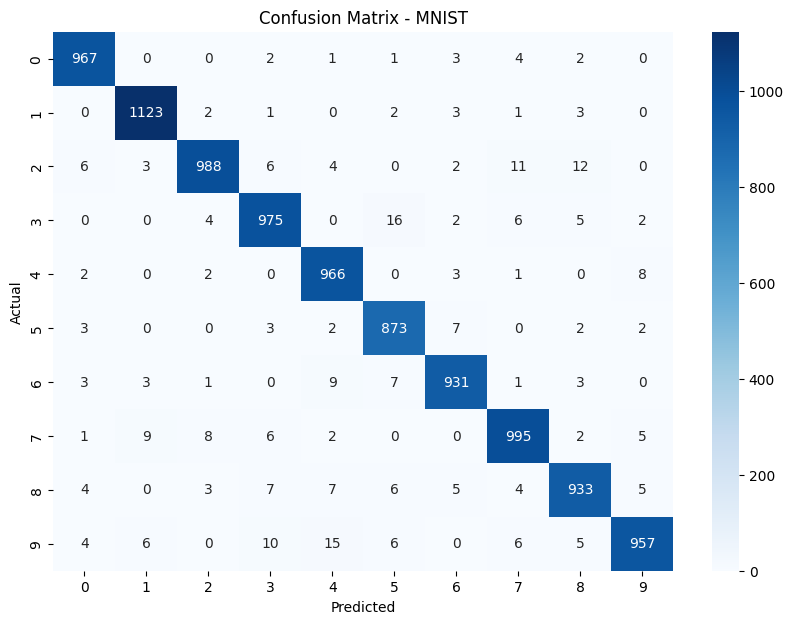

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MNIST")
plt.show()

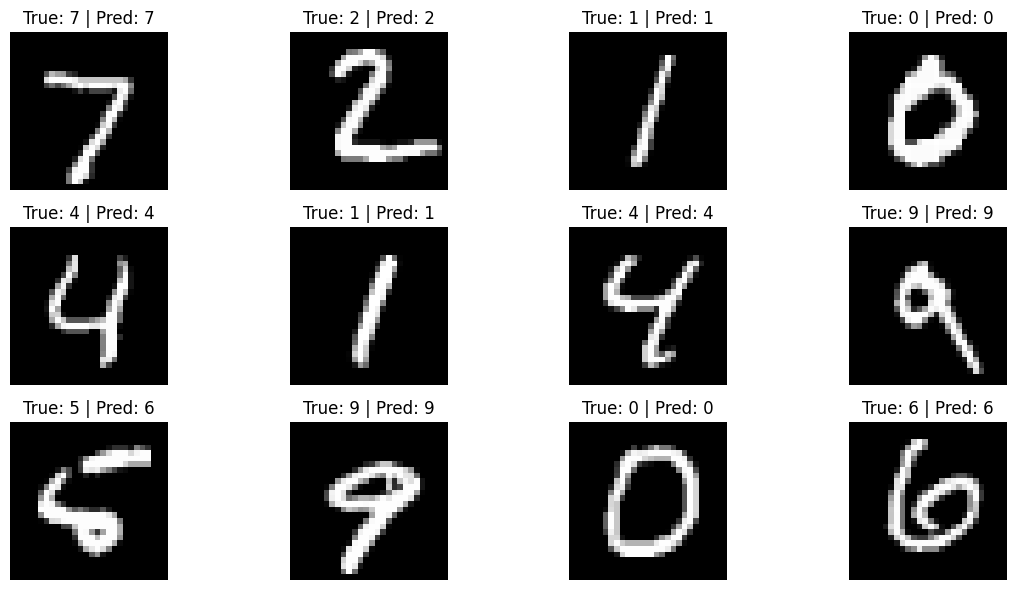

In [ ]:
# Show some test images with predictions
plt.figure(figsize=(12,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]} | Pred: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Misclassified Example

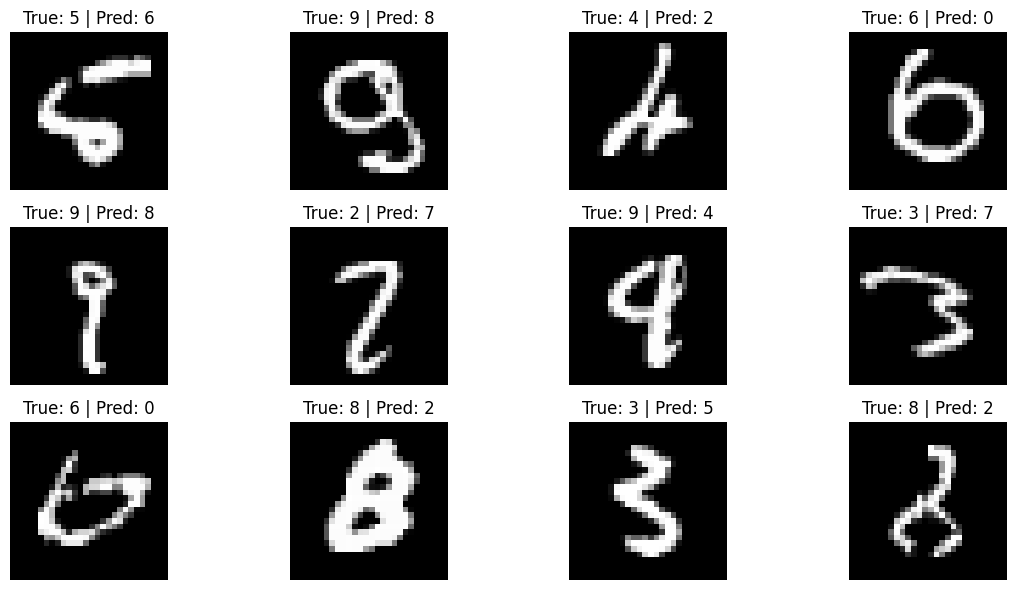

In [ ]:
# Find misclassified images
misclassified_idx = np.where(y_pred != y_test)[0]

plt.figure(figsize=(12,6))
for i, idx in enumerate(misclassified_idx[:12]):  # show first 12 misclassified
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]} | Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Per class Accuracy

In [ ]:
# Accuracy per digit class
class_acc = cm.diagonal() / cm.sum(axis=1)
for i, acc in enumerate(class_acc):
    print(f"Digit {i} Accuracy: {acc:.2f}")


Digit 0 Accuracy: 0.99
Digit 1 Accuracy: 0.99
Digit 2 Accuracy: 0.96
Digit 3 Accuracy: 0.97
Digit 4 Accuracy: 0.98
Digit 5 Accuracy: 0.98
Digit 6 Accuracy: 0.97
Digit 7 Accuracy: 0.97
Digit 8 Accuracy: 0.96
Digit 9 Accuracy: 0.95


**Summary**

This code loads the MNIST dataset, preprocesses it, builds and trains a simple Artificial Neural Network (ANN) model, and evaluates its performance using various metrics and visualizations like a confusion matrix and sample predictions.

**Project :- 2**

 DATA EXPLORATION

Load Dataset and explore structure

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map target numbers to actual class names
df['species'] = df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

# Explore structure
print(df.head())
print("\nShape of dataset:", df.shape)
print("\nColumns:", df.columns)
print("\nInfo:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Shape of dataset: (150, 5)

Columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 no

Check Missing Values

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


Data Visualization

(a) Distribution of Each Feature

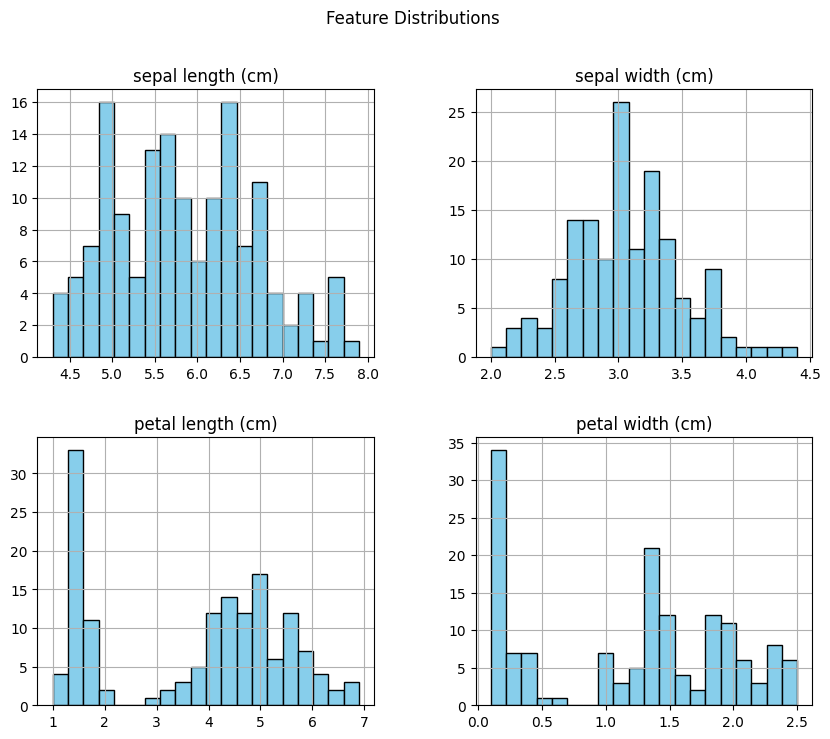

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(10,8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


(b) Pairplot for Feature Relationships

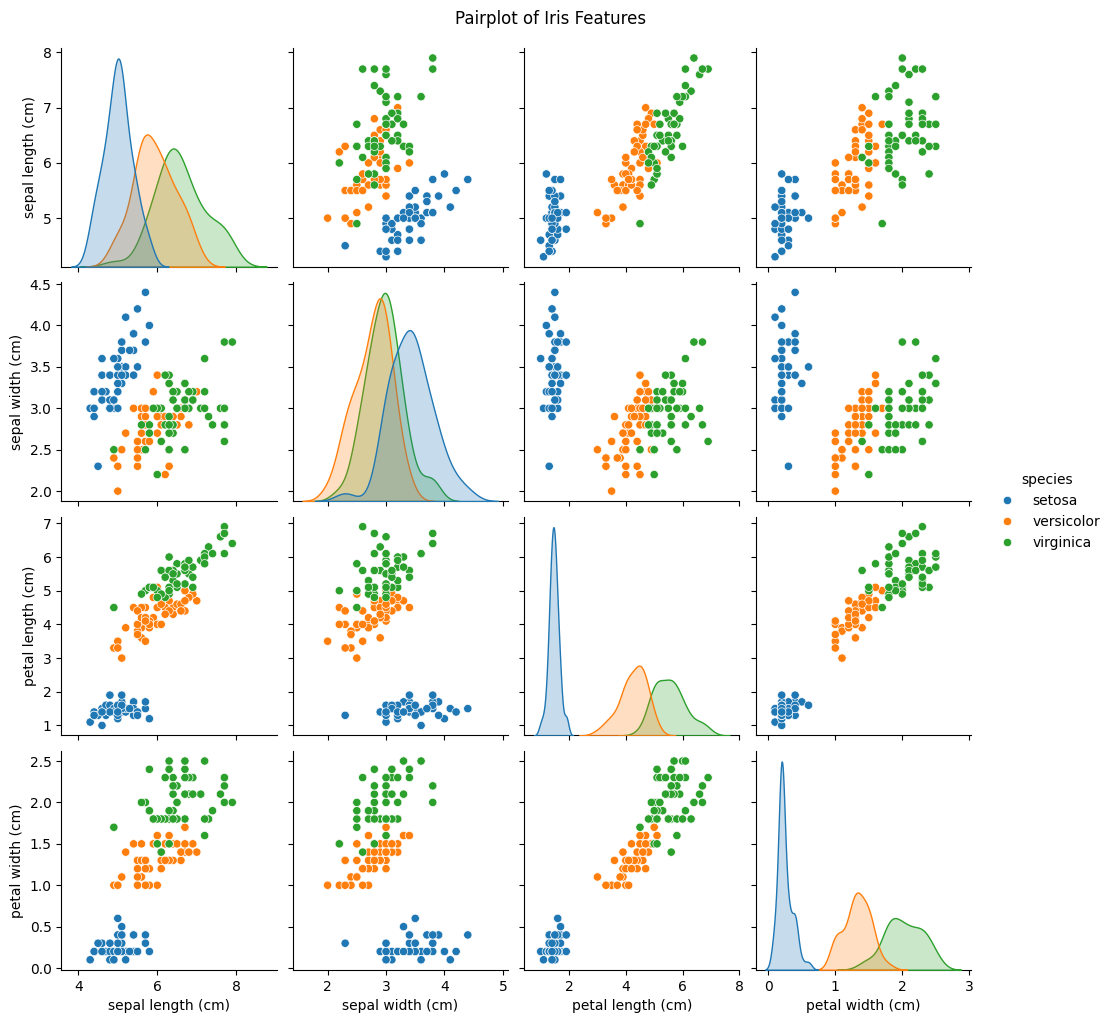

In [ ]:
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


Correlation Heatmap

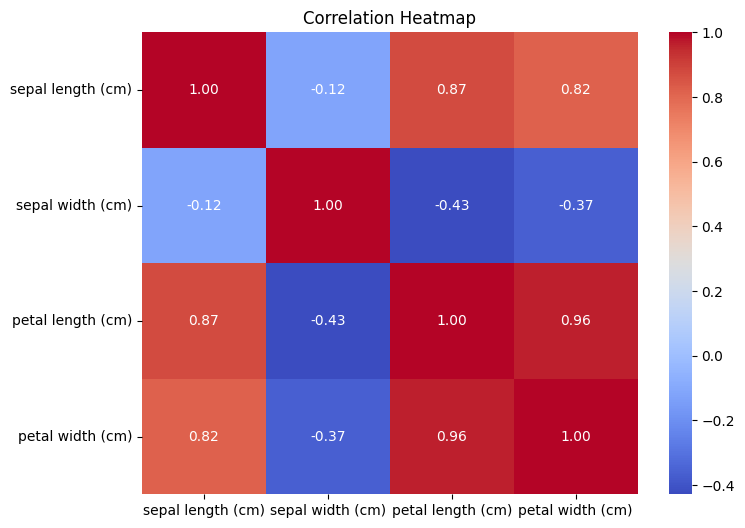

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns="species").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Boxplot Per Species

/tmp/ipython-input-790315125.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=col, data=df, palette="Set2")
/tmp/ipython-input-790315125.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=col, data=df, palette="Set2")
/tmp/ipython-input-790315125.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=col, data=df, palette="Set2")
/tmp/ipython-input-790315125.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

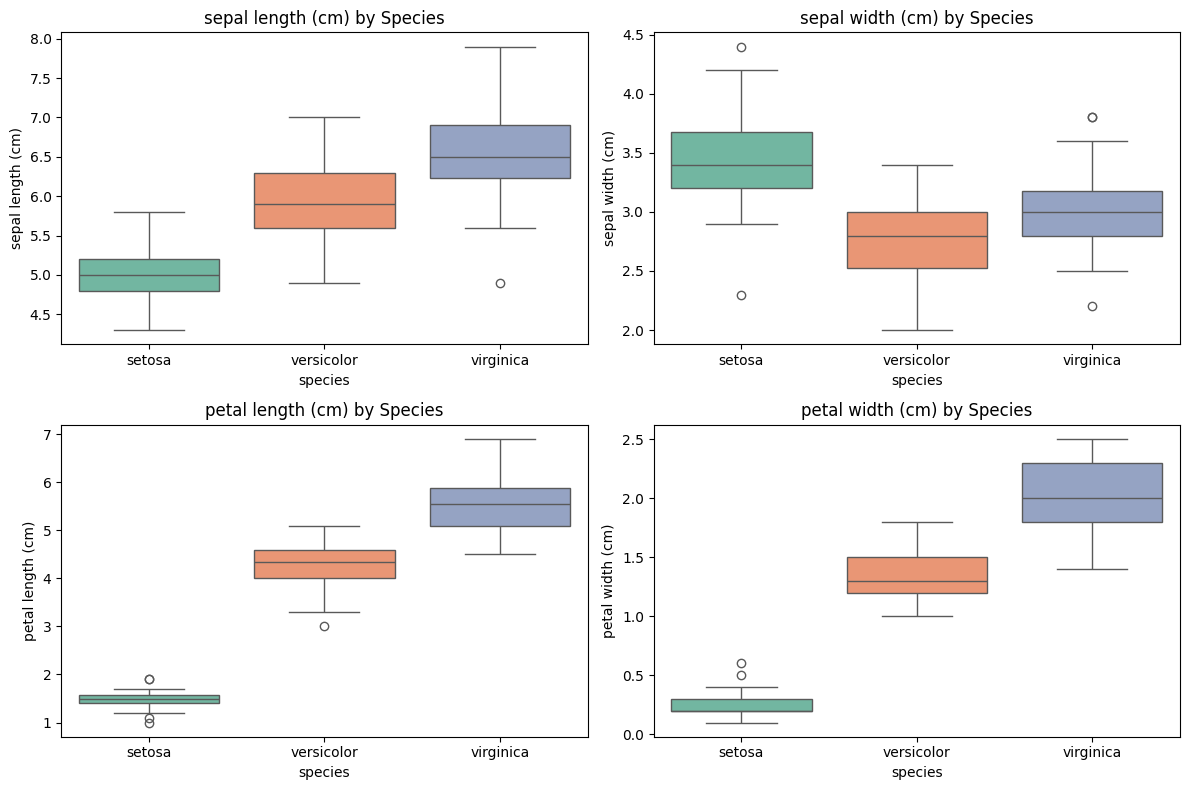

In [ ]:
# Boxplots of each feature grouped by species
plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:-1], 1):  # skip 'species' column
    plt.subplot(2,2,i)
    sns.boxplot(x="species", y=col, data=df, palette="Set2")
    plt.title(f"{col} by Species")

plt.tight_layout()
plt.show()


**Summary**

This project focuses on data exploration of the Iris dataset. It involves loading the dataset, examining its structure (such as shape, columns, and data types), and checking for any missing values. The distribution of the data is visualized with histograms, while pairplots are used to explore relationships between different features. The correlation between features is shown through a heatmap. Finally, the distribution of features for each species is visualized with boxplots to understand the differences between the various species.

**Project :- 3**


 Analyzing and Visualizing Movie Ratings

Load & Preprocess Data

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/ratings.csv")

# Explore structure
print(df.head())
print(df.info())

# Drop missing values (if any)
df = df.dropna(subset=["rating"])

# Handle duplicates
df = df.drop_duplicates()


   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  imdbId  tmdbId  
0  Adventure|Animation|Children|Comedy|Fantasy  114709     862  
1                               Comedy|Romance  113228   15602  
2                        Action|Crime|Thriller  113277     949  
3                             Mystery|Thriller  114369     807  
4                       Crime|Mystery|Thriller  114814     629  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----

Summary Statistics

In [ ]:
import numpy as np
from statistics import mode

print("Mean Rating:", df["rating"].mean())
print("Median Rating:", df["rating"].median())
print("Mode Rating:", mode(df["rating"]))


Mean Rating: 3.501556983616962
Median Rating: 3.5
Mode Rating: 4.0


Visualize Distribution of Ratings

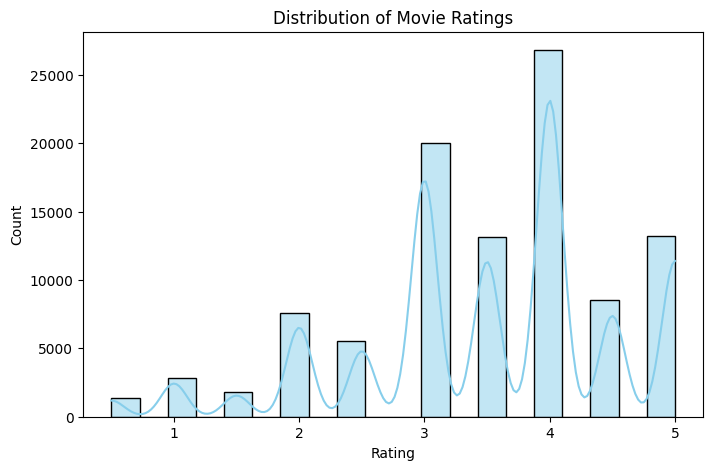

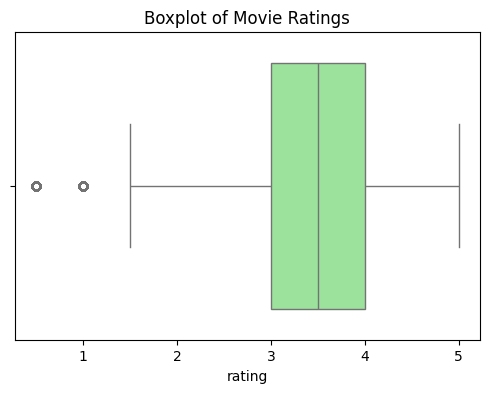

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df["rating"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["rating"], color="lightgreen")
plt.title("Boxplot of Movie Ratings")
plt.show()


Top Rated Movies

In [ ]:
# Top 10 movies
top_movies = df.sort_values(by="rating", ascending=False).head(10)
print("Top Rated Movies:\n", top_movies[["title", "rating"]])

# Average rating per genre
genre_ratings = df.groupby("genres")["rating"].mean().sort_values(ascending=False)
print("\nTop Genres by Average Rating:\n", genre_ratings)

Top Rated Movies:
                                     title  rating
100829                     Arrival (2016)     5.0
100814               The Nice Guys (2016)     5.0
86593                   Braveheart (1995)     5.0
21748                   Fight Club (1999)     5.0
21818               V for Vendetta (2006)     5.0
62                  Reservoir Dogs (1992)     5.0
64                  Basic Instinct (1992)     5.0
65      E.T. the Extra-Terrestrial (1982)     5.0
35                       Pinocchio (1940)     5.0
36                           Fargo (1996)     5.0

Top Genres by Average Rating:
 genres
Drama|Horror|Romance                    5.0
Fantasy|Mystery|Western                 5.0
Drama|Fantasy|Musical|Mystery|Sci-Fi    5.0
Comedy|Drama|Fantasy|Mystery|Romance    5.0
Comedy|Horror|Mystery                   5.0
                                       ... 
Drama|Fantasy|Sci-Fi|Thriller           0.5
Crime|Horror|Sci-Fi                     0.5
Action|Adventure|Comedy|Sci-Fi|IMAX     